In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [52]:
df = pd.read_csv("students_adaptability_level_online_education.csv")
df

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Girl,16-20,College,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Low
1201,Girl,16-20,College,Non Government,No,No,High,Mid,Wifi,4G,3-6,No,Mobile,Moderate
1202,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,Moderate
1203,Girl,16-20,College,Non Government,No,No,Low,Mid,Wifi,4G,1-3,No,Mobile,Low


In [53]:
#melihat baris dan kolom data
df.shape

(1205, 14)

In [54]:
#chek tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 66.0+ KB


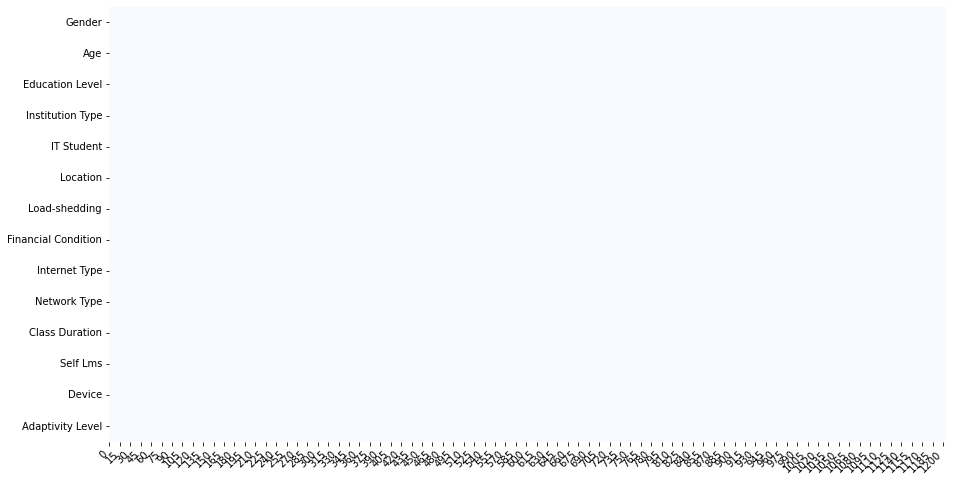

In [55]:
#melihat nan value
from jcopml.plot import plot_missing_value
plot_missing_value(df)

In [56]:
#melihat describe data set
df.describe().T

,count,unique,top,freq
Gender,1205,2,Boy,663
Age,1205,6,21-25,374
Education Level,1205,3,School,530
Institution Type,1205,2,Non Government,823
IT Student,1205,2,No,901
Location,1205,2,Yes,935
Load-shedding,1205,2,Low,1004
Financial Condition,1205,3,Mid,878
Internet Type,1205,2,Mobile Data,695
Network Type,1205,3,4G,775


### Visualization

<AxesSubplot:ylabel='Adaptivity Level'>

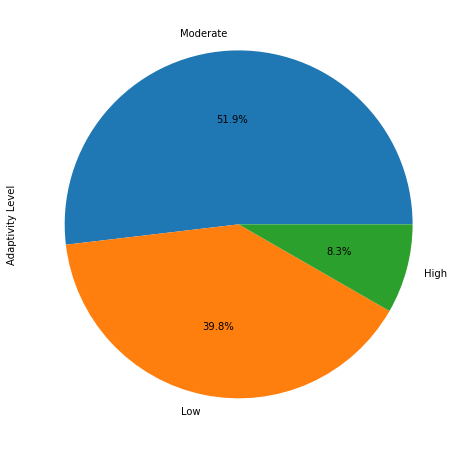

In [57]:
# melihat presentasi level adaptasi di dataset

plt.figure(figsize=(12,8))
df['Adaptivity Level'].value_counts().plot.pie(autopct='%1.1f%%')


### Presentasi level adaptasi
- Moderate 51.9%
- low 39.8%
- High 8.3%

<AxesSubplot:ylabel='Gender'>

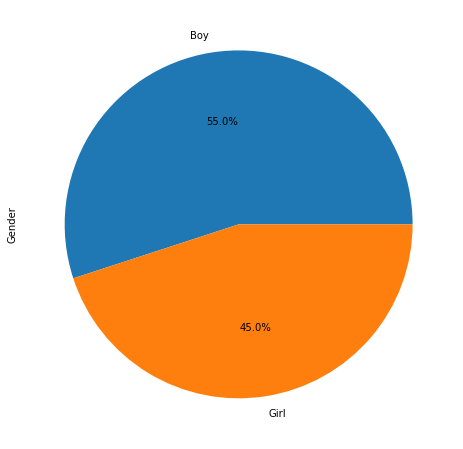

In [58]:
# melihat presentasi jenis kelamin di dataset

plt.figure(figsize=(12,8))
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%')


### Presentasi jenis kelamin
- Boy 55%
- Girl 45%

<AxesSubplot:ylabel='Device'>

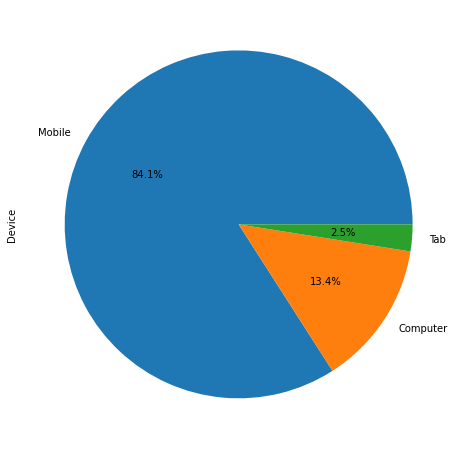

In [59]:
# melihat presentasi perangkat di dataset

plt.figure(figsize=(12,8))
df['Device'].value_counts().plot.pie(autopct='%1.1f%%')


### Presentasi perangkat
- Mobile 84%
- Computer 13.4%
- Tab 2.5%

<AxesSubplot:xlabel='Institution Type', ylabel='count'>

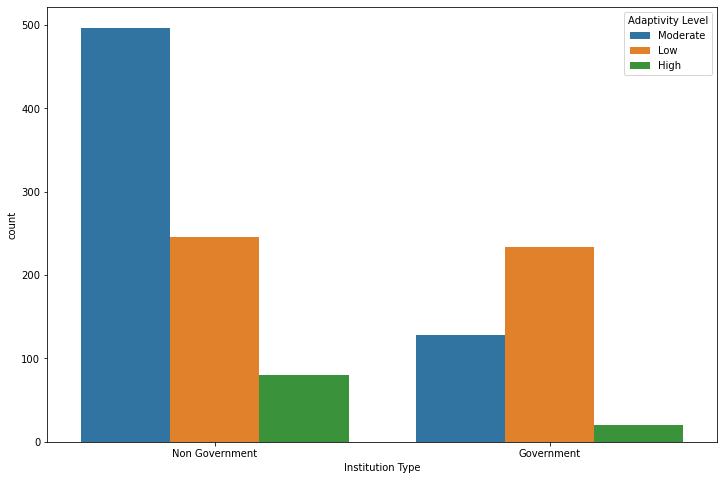

In [60]:
#melihat pengaruh tipe institusi dalam Tingkat Adaptif menggunakan Dataset
plt.figure(figsize=(12,8))
sns.countplot(df["Institution Type"],hue=df["Adaptivity Level"])

- institusi non government lebih tinggi dari pada government dalam tingkat adaptif

<AxesSubplot:xlabel='Financial Condition', ylabel='count'>

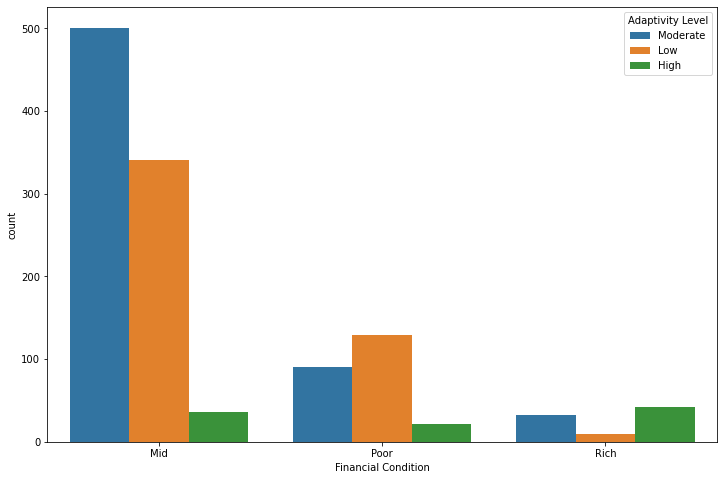

In [61]:
#melihat pengaruh Kondisi Keuangan dalam Tingkat Adaptif menggunakan Dataset
plt.figure(figsize=(12,8))

sns.countplot(df["Financial Condition"],hue=df["Adaptivity Level"])

- Kondisi Keuangan pada keluarga yang memiliki keuangan menengah memiliki persentase Tingkat Adaptifitas tertinggi kemudian keluarga miskin dan keluarga kaya memiliki Tingkat Adaptasi yang kurang

<AxesSubplot:xlabel='Network Type', ylabel='count'>

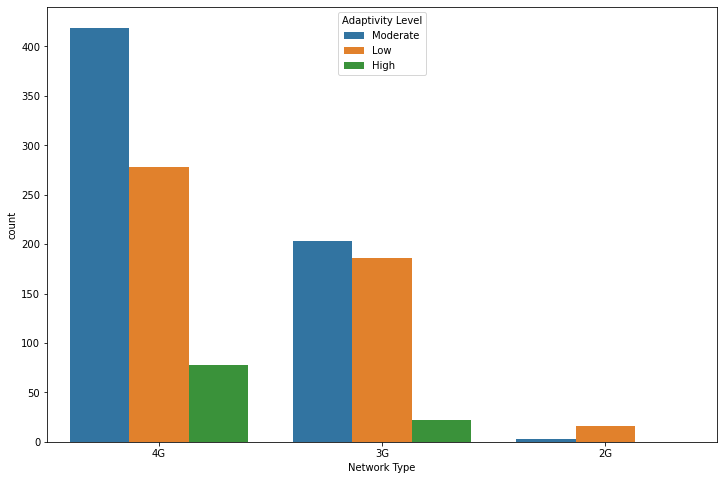

In [62]:
#melihat pengaruh tipe internet dalam Tingkat Adaptif menggunakan Dataset
plt.figure(figsize=(12,8))
sns.countplot(df["Network Type"],hue=df["Adaptivity Level"])

- sebagian besar siswa menggunakan 4G, dan Jaringan 4G memiliki kemajuan tertinggi

### Machine Learning Model/Classification

In [63]:
#Importing librarires - classification


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


from sklearn.preprocessing import LabelEncoder,StandardScaler

In [64]:
# ubah semua data kategorikal menggunakan LabelEncoder

data=df

label_encoders = {}
categorical_columns = data.columns  
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [65]:
data.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,0,3,2,1,0,1,1,0,1,2,2,0,2,2
1,1,3,2,1,0,1,0,0,0,2,1,1,1,2
2,1,2,0,0,0,1,1,0,1,2,1,0,1,2
3,1,1,1,1,0,1,1,0,0,2,1,0,1,2
4,1,2,1,1,0,1,1,1,0,1,0,0,1,1


In [66]:
#memisahkan data training dan test
X = data.drop(columns='Adaptivity Level')
Y = data['Adaptivity Level']

In [67]:
# menyiapkan model
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluasi model
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.683747 (0.062349)
LDA: 0.677101 (0.057296)
KNN: 0.810730 (0.031724)
CART: 0.917775 (0.021694)
NB: 0.647293 (0.039770)
SVM: 0.742755 (0.047473)


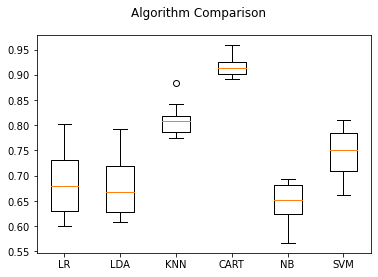

In [68]:
# algoritma boxplot 
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()